# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [11]:
from ddpg import DDPGAgent
from collections import deque
from importlib import reload
import torch
import matplotlib.pyplot as plt

In [23]:
# reload modules when the file has been edited
import ddpg
reload(ddpg)
import utils
reload(utils)
from ddpg import DDPGAgent

In [6]:
def maddpg(n_episodes=2000, max_t=1000):
    """ Multi-Agent DDPG Learning """
    
    all_scores = []                    # list containing all scores from each episode (avg over all agents)
    scores_window = deque(maxlen=100)  # deque containing last 100 scores (avg over all agents)
    scores_movavg = []                 # list containing moving average of scores (avg over all agents)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, add_noise=True)      # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            # for MADDPG: Reshape / Combine all states
            next_states = np.reshape(env_info.vector_observations, (1, 48)) 
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            # for MADDPG: Let both agents learn
            agent_0.step(states, actions, rewards[0], next_states, done, 0) 
            agent_1.step(states, actions, rewards[1], next_states, done, 1) 
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        # append scores
        best_score = np.max(scores)
        scores_window.append(best_score)
        all_scores.append(best_score)
        scores_movavg.append(np.mean(scores_window))
        
        # print results
        print('\rEpisode {} \tEpisode Score: {:.2f} \tMoving Average: {:.2f}'.format(
                i_episode, best_score, np.mean(scores_window)), end="")            
        if i_episode % 100 == 0:
            print('\nEpisode {} \tAverage Score: {:.2f} \t'.format(
                i_episode, np.mean(scores_window)), end="")
            
        # check if environment has been solved
        if np.mean(scores_window) >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {:d} episodes! \tAverage Score over 100 episodes: {:.2f}'.format(
                i_episode-100, np.mean(scores_window)))
            # Save weights if environment is solved
            agent_0.save_checkpoint()
            agent_1.save_checkpoint()
            break
        
    return all_scores, scores_movavg

In [7]:
def get_actions(states, add_noise):
    """ get action from individual agent and concat """
    action_0 = agent_0.act(states, add_noise)
    action_1 = agent_1.act(states, add_noise)
    return np.concatenate((action_0, action_1), axis=0).flatten()

In [35]:
# Plot of rewards function
def plot_rewards(scores, average_scores):
    # make plot
    ax = plt.plot(np.arange(1, len(scores)+1), scores, color='grey', label='episode score')
    ax = plt.plot(np.arange(1, len(scores)+1), average_scores, color='orange', label='average')
    plt.title('MADDPG training results', fontdict={'fontsize': 14})
    plt.xlabel('episodes', fontdict={'fontsize': 12})
    plt.ylabel('score', fontdict={'fontsize': 12})
    plt.hlines(0.5, xmin=0, xmax=len(scores), colors='0.5', linestyles='dashed', label='target')
    plt.legend();

In [34]:
# initialize two agents and train
agent_0 = DDPGAgent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = DDPGAgent(state_size, action_size, num_agents=1, random_seed=0)
scores, mov_avgs = maddpg()           

Episode 100 	Average Score: 0.00 	
Episode 200 	Average Score: 0.00 	
Episode 300 	Average Score: 0.01 	
Episode 400 	Average Score: 0.01 	
Episode 500 	Average Score: 0.03 	
Episode 600 	Average Score: 0.03 	
Episode 700 	Average Score: 0.09 	
Episode 800 	Average Score: 0.10 	
Episode 900 	Average Score: 0.07 	
Episode 1000 	Average Score: 0.13 	
Episode 1100 	Average Score: 0.17 	
Episode 1200 	Average Score: 0.19 	
Episode 1300 	Average Score: 0.27 	
Episode 1400 	Average Score: 0.39 	
Environment solved in 1377 episodes! 	Average Score over 100 episodes: 0.51


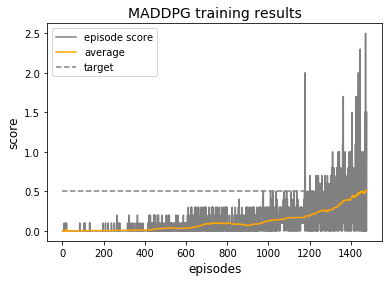

In [42]:
# Plot of rewards
plot_rewards(scores, mov_avgs)